In [2]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize as op
import math
import torch

In [ ]:
vin = pandas.read_csv('./data/1000_corner_vin1_input.csv')
vin

,/VIN1 (VIN1=0) X,/VIN1 (VIN1=0) Y,/VIN1 (VIN1=0.005005005) X,/VIN1 (VIN1=0.005005005) Y,/VIN1 (VIN1=0.01001001) X,/VIN1 (VIN1=0.01001001) Y,/VIN1 (VIN1=0.01501501) X,/VIN1 (VIN1=0.01501501) Y,/VIN1 (VIN1=0.02002002) X,/VIN1 (VIN1=0.02002002) Y,...,/VIN1 (VIN1=4.97998) X,/VIN1 (VIN1=4.97998) Y,/VIN1 (VIN1=4.984985) X,/VIN1 (VIN1=4.984985) Y,/VIN1 (VIN1=4.98999) X,/VIN1 (VIN1=4.98999) Y,/VIN1 (VIN1=4.994995) X,/VIN1 (VIN1=4.994995) Y,/VIN1 (VIN1=5) X,/VIN1 (VIN1=5) Y
0,0.00,0,1.00,1.000000,2.00,2.00000,3.00,3.00000,4.00,4.00000,...,995.00,995.00,996.00,996.000,997.00,997.00,998.00,998.000,999.00,999
1,0.00,0,0.00,0.005005,0.00,0.01001,0.00,0.01502,0.00,0.02002,...,0.00,4.98,0.00,4.985,0.00,4.99,0.00,4.995,0.00,5
2,0.01,0,0.01,0.005005,0.01,0.01001,0.01,0.01502,0.01,0.02002,...,0.01,4.98,0.01,4.985,0.01,4.99,0.01,4.995,0.01,5
3,0.02,0,0.02,0.005005,0.02,0.01001,0.02,0.01502,0.02,0.02002,...,0.02,4.98,0.02,4.985,0.02,4.99,0.02,4.995,0.02,5
4,0.03,0,0.03,0.005005,0.03,0.01001,0.03,0.01502,0.03,0.02002,...,0.03,4.98,0.03,4.985,0.03,4.99,0.03,4.995,0.03,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1496,14.95,0,14.95,0.005005,14.95,0.01001,14.95,0.01502,14.95,0.02002,...,14.95,4.98,14.95,4.985,14.95,4.99,14.95,4.995,14.95,5
1497,14.96,0,14.96,0.005005,14.96,0.01001,14.96,0.01502,14.96,0.02002,...,14.96,4.98,14.96,4.985,14.96,4.99,14.96,4.995,14.96,5
1498,14.97,0,14.97,0.005005,14.97,0.01001,14.97,0.01502,14.97,0.02002,...,14.97,4.98,14.97,4.985,14.97,4.99,14.97,4.995,14.97,5
1499,14.98,0,14.98,0.005005,14.98,0.01001,14.98,0.01502,14.98,0.02002,...,14.98,4.98,14.98,4.985,14.98,4.99,14.98,4.995,14.98,5


In [ ]:
spk = pandas.read_csv('./data/1000_corner_of_spike.csv')
spk

,/VIN1 (VIN1=0) X,/VIN1 (VIN1=0) Y,/VIN1 (VIN1=0.005005005) X,/VIN1 (VIN1=0.005005005) Y,/VIN1 (VIN1=0.01001001) X,/VIN1 (VIN1=0.01001001) Y,/VIN1 (VIN1=0.01501501) X,/VIN1 (VIN1=0.01501501) Y,/VIN1 (VIN1=0.02002002) X,/VIN1 (VIN1=0.02002002) Y,...,/VIN1 (VIN1=4.97998) X,/VIN1 (VIN1=4.97998) Y,/VIN1 (VIN1=4.984985) X,/VIN1 (VIN1=4.984985) Y,/VIN1 (VIN1=4.98999) X,/VIN1 (VIN1=4.98999) Y,/VIN1 (VIN1=4.994995) X,/VIN1 (VIN1=4.994995) Y,/VIN1 (VIN1=5) X,/VIN1 (VIN1=5) Y
0,0.00,0.0000,1.00,1.0000,2.00,2.0000,3.00,3.0000,4.00,4.0000,...,995.00,995.0000,996.00,996.0000,997.00,997.0000,998.00,998.0000,999.00,999.0000
1,0.00,0.2177,0.00,0.2177,0.00,0.2177,0.00,0.2177,0.00,0.2177,...,0.00,0.4013,0.00,0.4014,0.00,0.4014,0.00,0.4014,0.00,0.4014
2,0.01,0.2176,0.01,0.2176,0.01,0.2176,0.01,0.2176,0.01,0.2176,...,0.01,0.2839,0.01,0.2839,0.01,0.2839,0.01,0.2839,0.01,0.2840
3,0.02,0.2176,0.02,0.2176,0.02,0.2176,0.02,0.2176,0.02,0.2176,...,0.02,0.2403,0.02,0.2403,0.02,0.2403,0.02,0.2403,0.02,0.2403
4,0.03,0.2176,0.03,0.2176,0.03,0.2176,0.03,0.2176,0.03,0.2176,...,0.03,0.2258,0.03,0.2258,0.03,0.2258,0.03,0.2258,0.03,0.2258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1496,14.95,0.2176,14.95,0.2176,14.95,0.2176,14.95,0.2176,14.95,0.2176,...,14.95,0.2711,14.95,0.4175,14.95,0.5493,14.95,0.6672,14.95,0.7727
1497,14.96,0.2176,14.96,0.2176,14.96,0.2176,14.96,0.2176,14.96,0.2176,...,14.96,0.4439,14.96,0.5729,14.96,0.6885,14.96,0.7915,14.96,0.8838
1498,14.97,0.2176,14.97,0.2176,14.97,0.2176,14.97,0.2176,14.97,0.2176,...,14.97,0.5961,14.97,0.7091,14.97,0.8103,14.97,0.9003,14.97,0.9803
1499,14.98,0.2176,14.98,0.2176,14.98,0.2177,14.98,0.2177,14.98,0.2177,...,14.98,0.7295,14.98,0.8282,14.98,0.9163,14.98,0.9950,14.98,1.0650


In [ ]:
t   = torch.tensor(vin.iloc[1:,0].to_numpy()).repeat(999,1).T
VIN = torch.tensor(vin.iloc[1:,1:-1:2].to_numpy())
SPK = torch.tensor(spk.iloc[1:,1:-1:2].to_numpy())

data = torch.stack([t, VIN, SPK])
data.shape

torch.Size([3, 1500, 999])

Text(0, 0.5, 'V_spk')

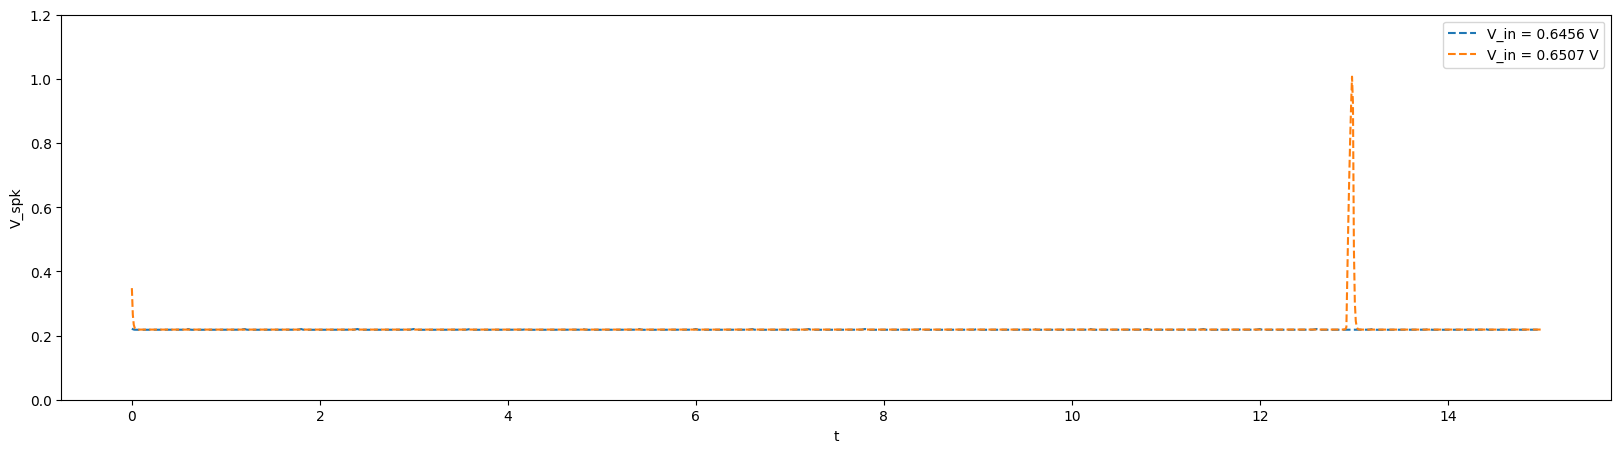

In [30]:
plt.figure(figsize=[20,5])
for i in range(129,131):
    # i = k * 100
    plt.plot(data[0,:,i], data[2,:,i], '--', label=f'V_in = {data[1,0,i]:.4f} V')
plt.legend()
plt.ylim([0,1.2])
plt.xlabel('t')
plt.ylabel('V_spk')

Text(0, 0.5, 'V_spk')

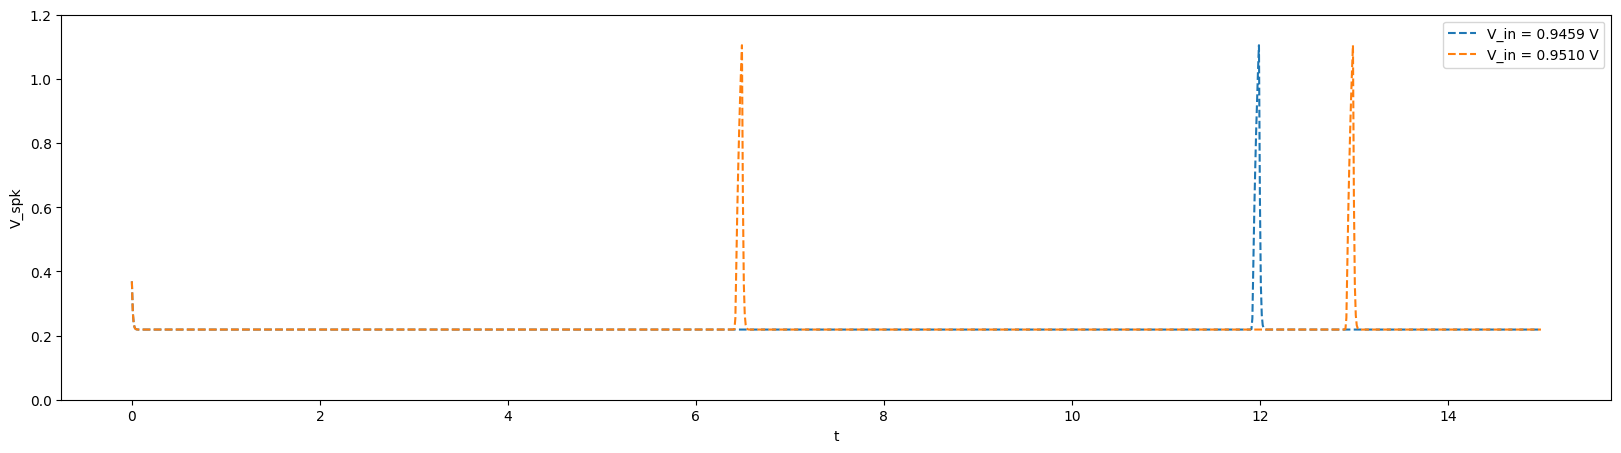

In [6]:
plt.figure(figsize=[20,5])
for i in range(189,191):
    # i = k * 100
    plt.plot(data[0,:,i], data[2,:,i], '--', label=f'V_in = {data[1,0,i]:.4f} V')
plt.legend()
plt.ylim([0,1.2])
plt.xlabel('t')
plt.ylabel('V_spk')

Text(0, 0.5, 'V_spk')

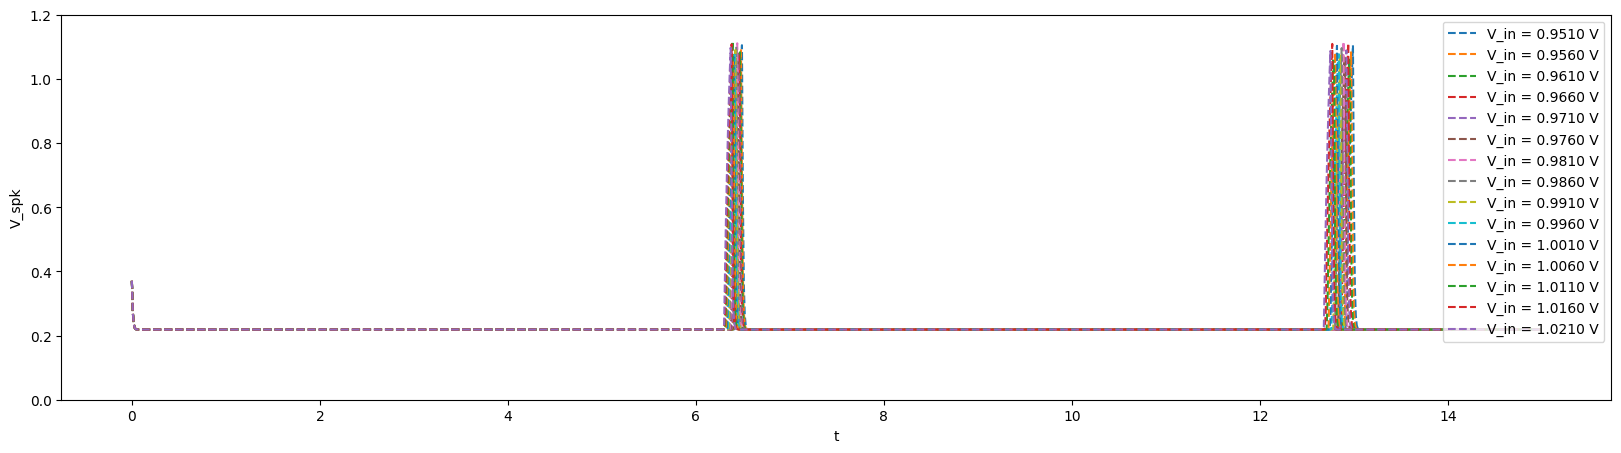

In [56]:
plt.figure(figsize=[20,5])
for i in range(190,205):
    # i = k * 100
    plt.plot(data[0,:,i], data[2,:,i], '--', label=f'V_in = {data[1,0,i]:.4f} V')
plt.legend()
plt.ylim([0,1.2])
plt.xlabel('t')
plt.ylabel('V_spk')

Text(0, 0.5, 'V_spk')

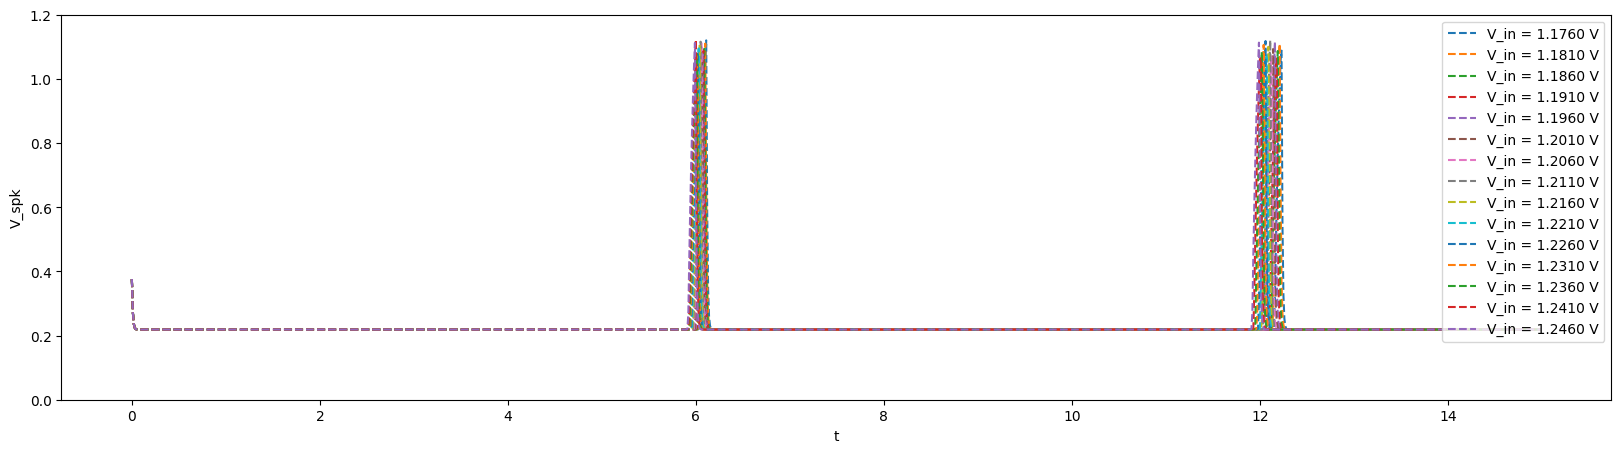

In [57]:
plt.figure(figsize=[20,5])
for i in range(235,250):
    # i = k * 100
    plt.plot(data[0,:,i], data[2,:,i], '--', label=f'V_in = {data[1,0,i]:.4f} V')
plt.legend()
plt.ylim([0,1.2])
plt.xlabel('t')
plt.ylabel('V_spk')

Text(0, 0.5, 'V_spk')

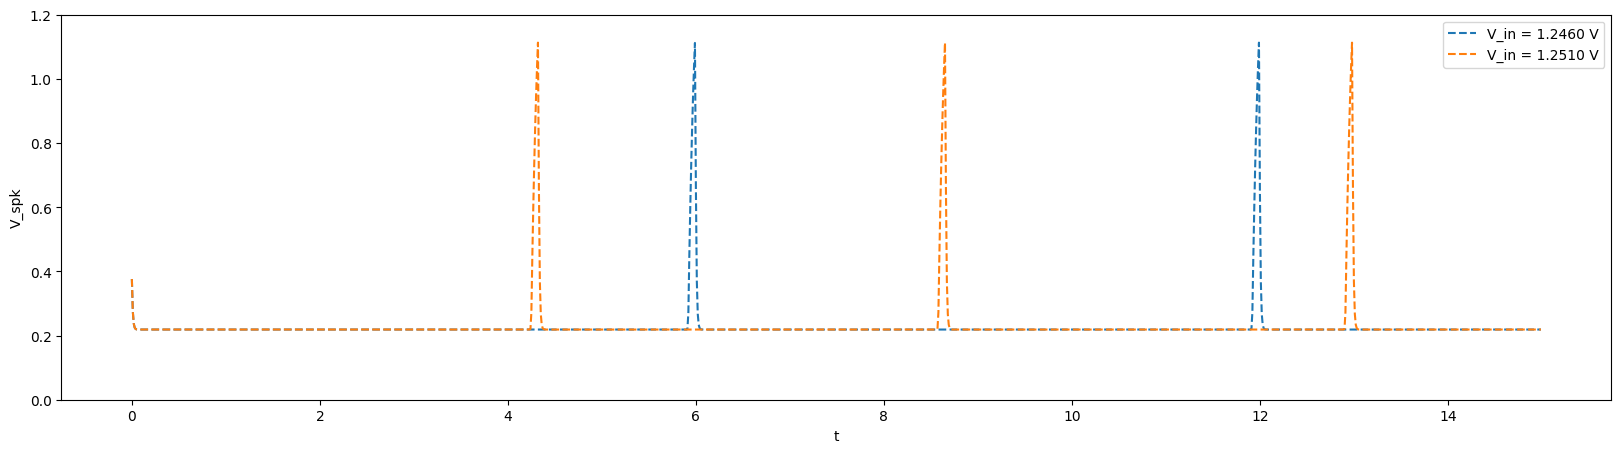

In [79]:
plt.figure(figsize=[20,5])
for i in range(249,251):
    # i = k * 100
    plt.plot(data[0,:,i], data[2,:,i], '--', label=f'V_in = {data[1,0,i]:.4f} V')
plt.legend()
plt.ylim([0,1.2])
plt.xlabel('t')
plt.ylabel('V_spk')

In [ ]:
[]

Text(0, 0.5, 'V_spk')

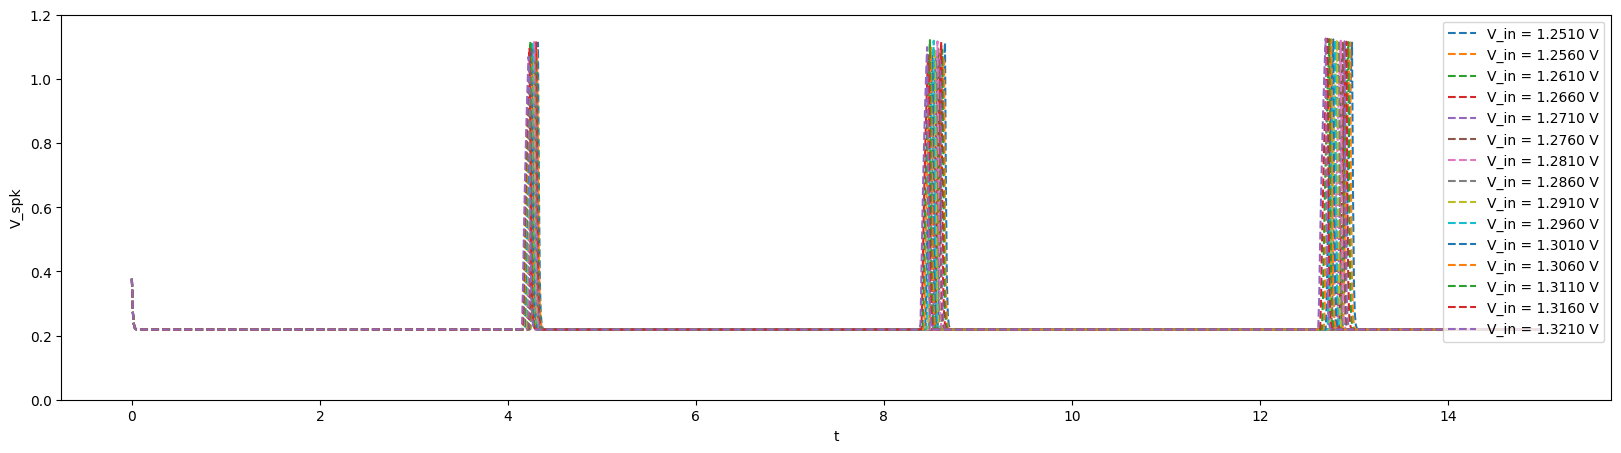

In [58]:
plt.figure(figsize=[20,5])
for i in range(250,265):
    # i = k * 100
    plt.plot(data[0,:,i], data[2,:,i], '--', label=f'V_in = {data[1,0,i]:.4f} V')
plt.legend()
plt.ylim([0,1.2])
plt.xlabel('t')
plt.ylabel('V_spk')

Text(0, 0.5, 'V_spk')

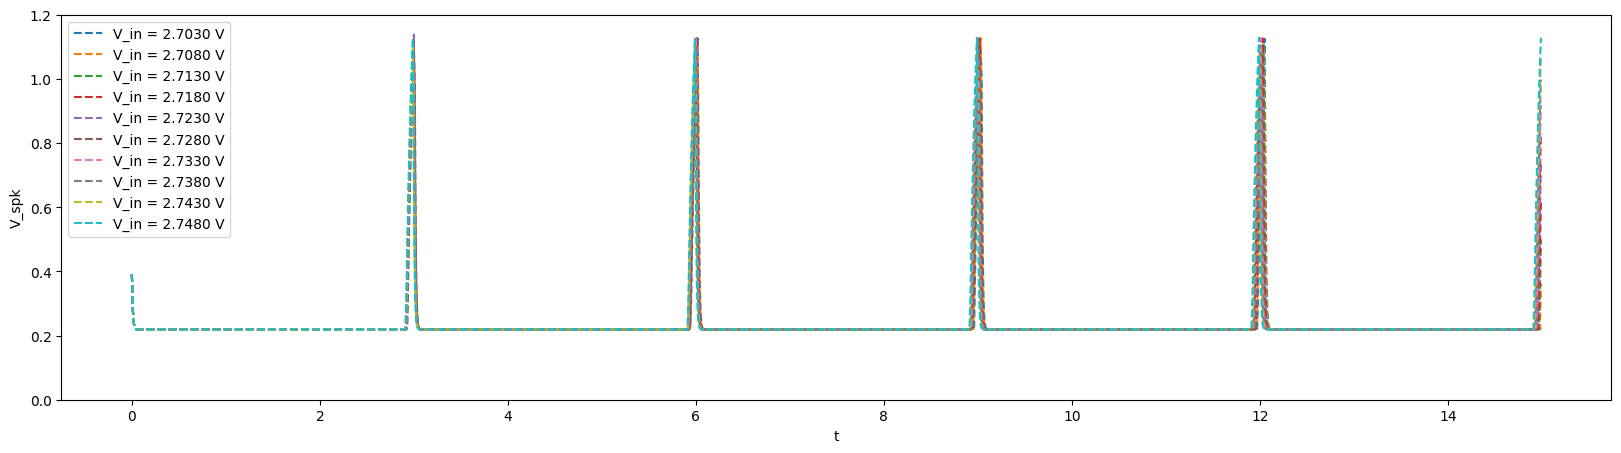

In [20]:
plt.figure(figsize=[20,5])
for i in range(540,550):
    # i = k * 100
    plt.plot(data[0,:,i], data[2,:,i], '--', label=f'V_in = {data[1,0,i]:.4f} V')
plt.legend()
plt.ylim([0,1.2])
plt.xlabel('t')
plt.ylabel('V_spk')

Text(0, 0.5, 'V_spk')

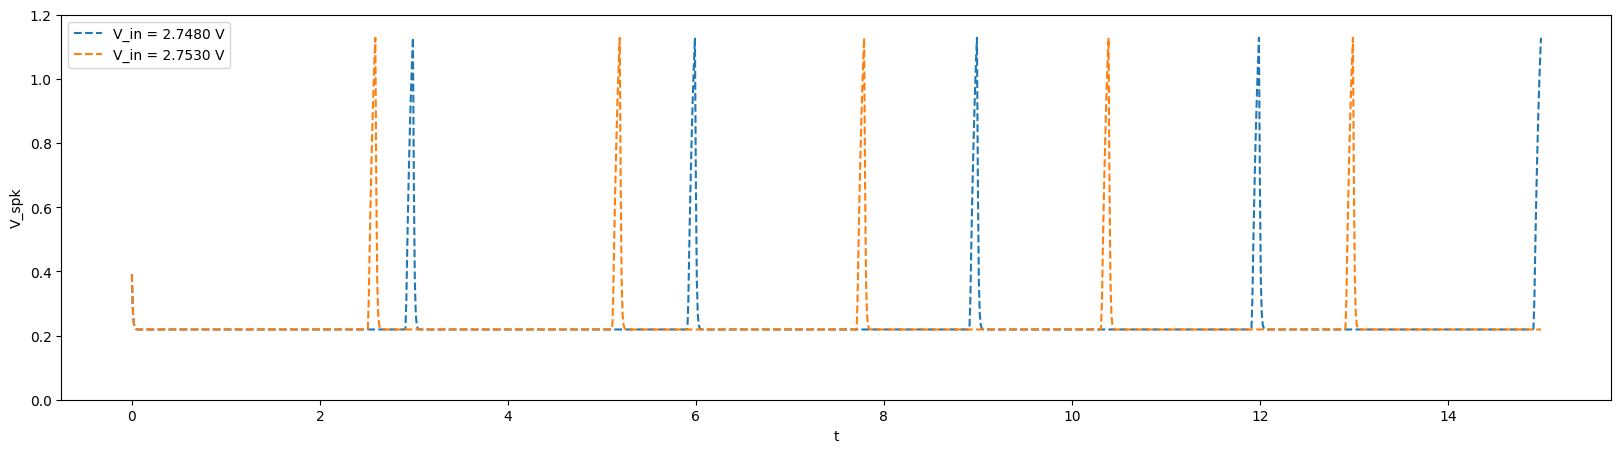

In [19]:
plt.figure(figsize=[20,5])
for i in range(549,551):
    # i = k * 100
    plt.plot(data[0,:,i], data[2,:,i], '--', label=f'V_in = {data[1,0,i]:.4f} V')
plt.legend()
plt.ylim([0,1.2])
plt.xlabel('t')
plt.ylabel('V_spk')

Text(0, 0.5, 'V_spk')

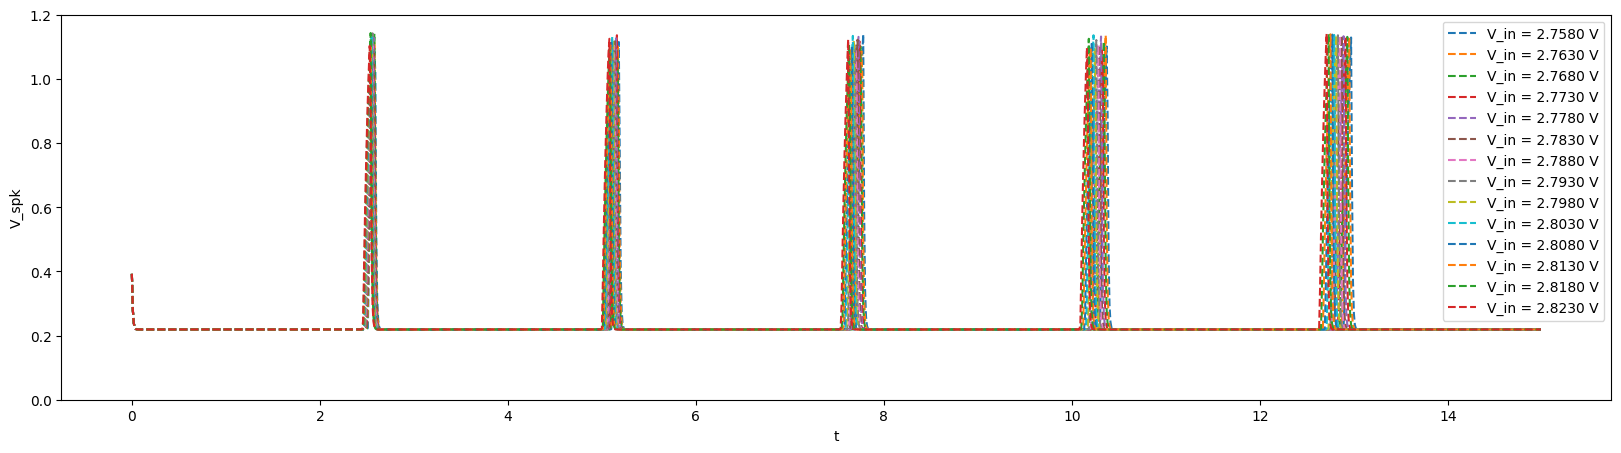

In [37]:
plt.figure(figsize=[20,5])
for i in range(551,565):
    # i = k * 100
    plt.plot(data[0,:,i], data[2,:,i], '--', label=f'V_in = {data[1,0,i]:.4f} V')
plt.legend()
plt.ylim([0,1.2])
plt.xlabel('t')
plt.ylabel('V_spk')

Text(0, 0.5, 'V_spk')

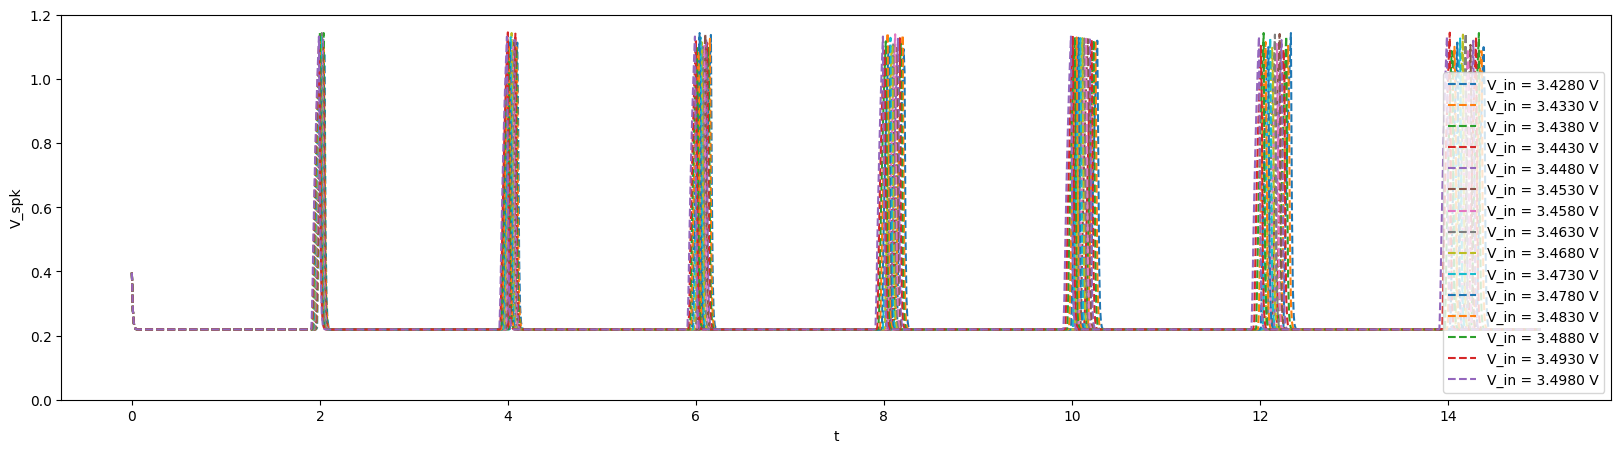

In [39]:
plt.figure(figsize=[20,5])
for i in range(685,700):
    # i = k * 100
    plt.plot(data[0,:,i], data[2,:,i], '--', label=f'V_in = {data[1,0,i]:.4f} V')
plt.legend()
plt.ylim([0,1.2])
plt.xlabel('t')
plt.ylabel('V_spk')

Text(0, 0.5, 'V_spk')

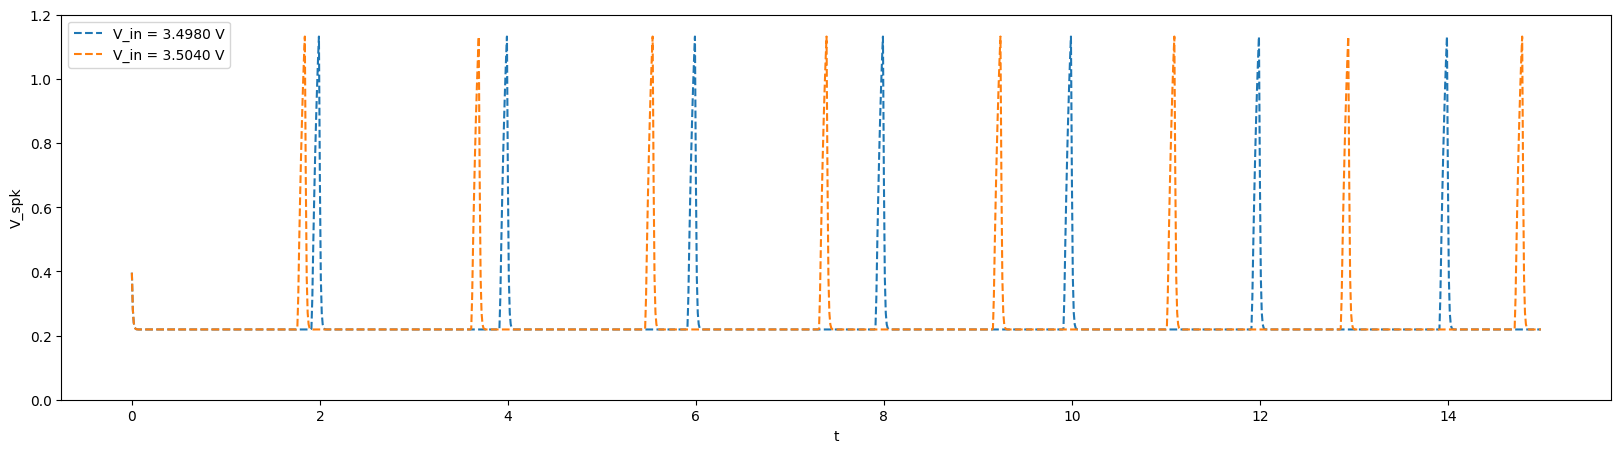

In [35]:
plt.figure(figsize=[20,5])
for i in range(699,701):
    # i = k * 100
    plt.plot(data[0,:,i], data[2,:,i], '--', label=f'V_in = {data[1,0,i]:.4f} V')
plt.legend()
plt.ylim([0,1.2])
plt.xlabel('t')
plt.ylabel('V_spk')

Text(0, 0.5, 'V_spk')

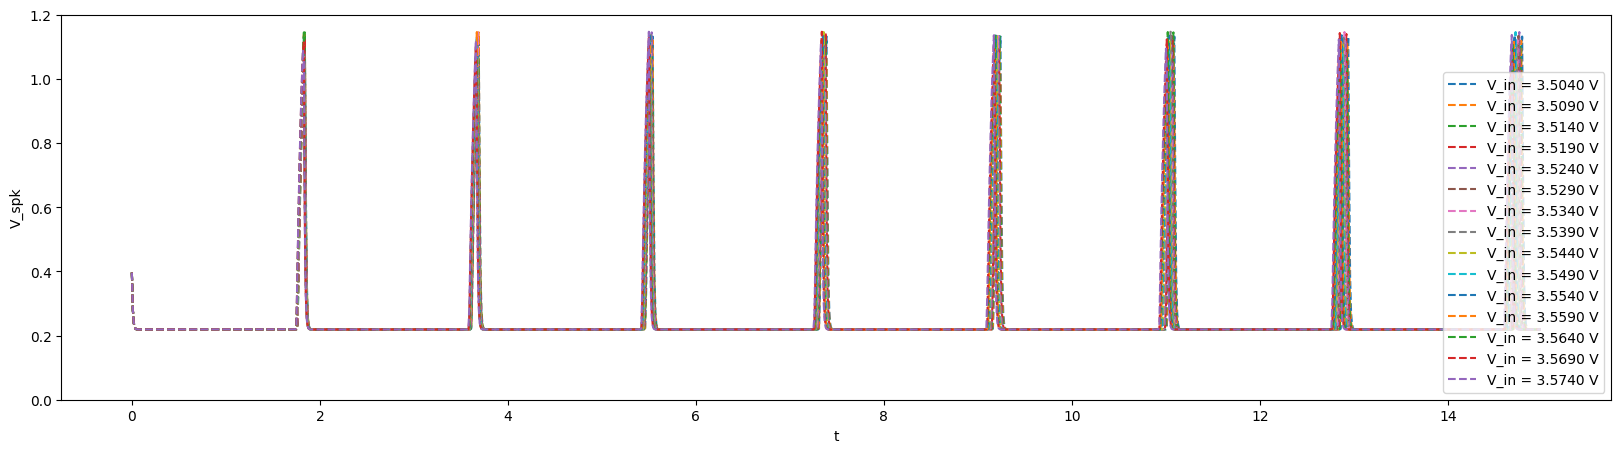

In [41]:
plt.figure(figsize=[20,5])
for i in range(700,715):
    # i = k * 100
    plt.plot(data[0,:,i], data[2,:,i], '--', label=f'V_in = {data[1,0,i]:.4f} V')
plt.legend()
plt.ylim([0,1.2])
plt.xlabel('t')
plt.ylabel('V_spk')

Text(0, 0.5, 'V_spk')

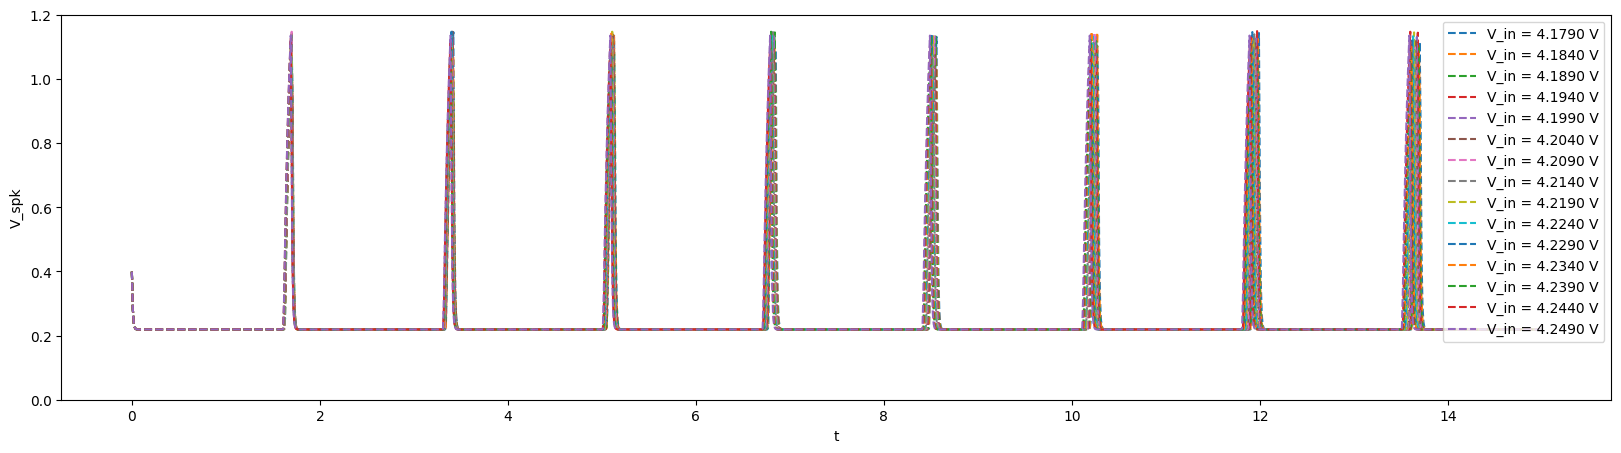

In [47]:
plt.figure(figsize=[20,5])
for i in range(835,850):
    # i = k * 100
    plt.plot(data[0,:,i], data[2,:,i], '--', label=f'V_in = {data[1,0,i]:.4f} V')
plt.legend()
plt.ylim([0,1.2])
plt.xlabel('t')
plt.ylabel('V_spk')

Text(0, 0.5, 'V_spk')

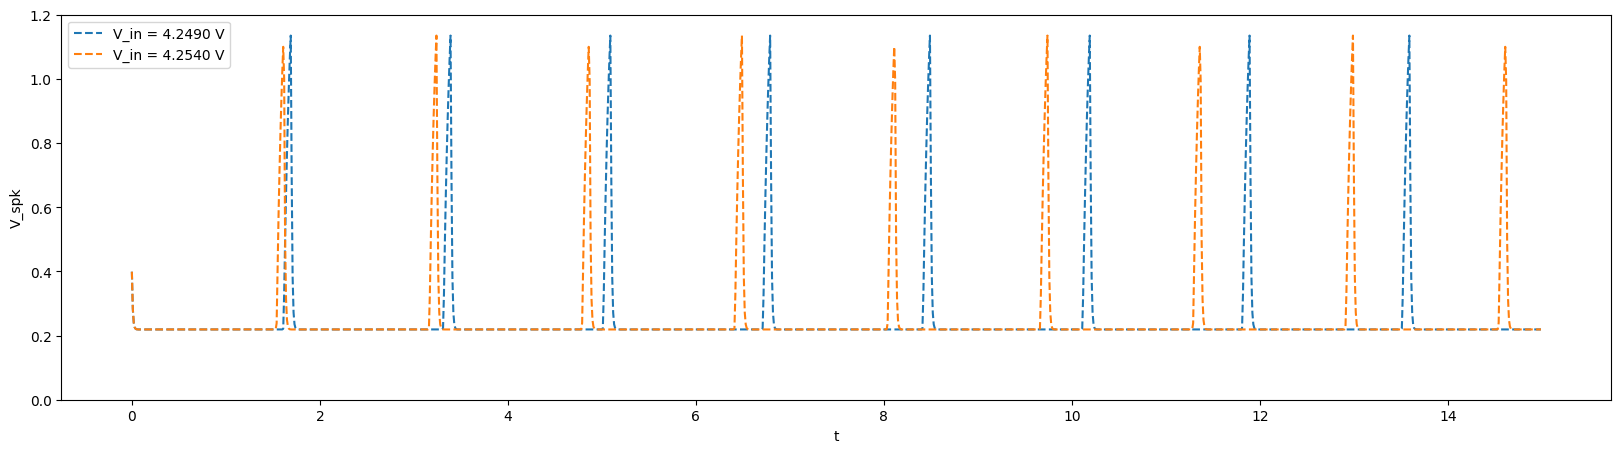

In [45]:
plt.figure(figsize=[20,5])
for i in range(849,851):
    # i = k * 100
    plt.plot(data[0,:,i], data[2,:,i], '--', label=f'V_in = {data[1,0,i]:.4f} V')
plt.legend()
plt.ylim([0,1.2])
plt.xlabel('t')
plt.ylabel('V_spk')

Text(0, 0.5, 'V_spk')

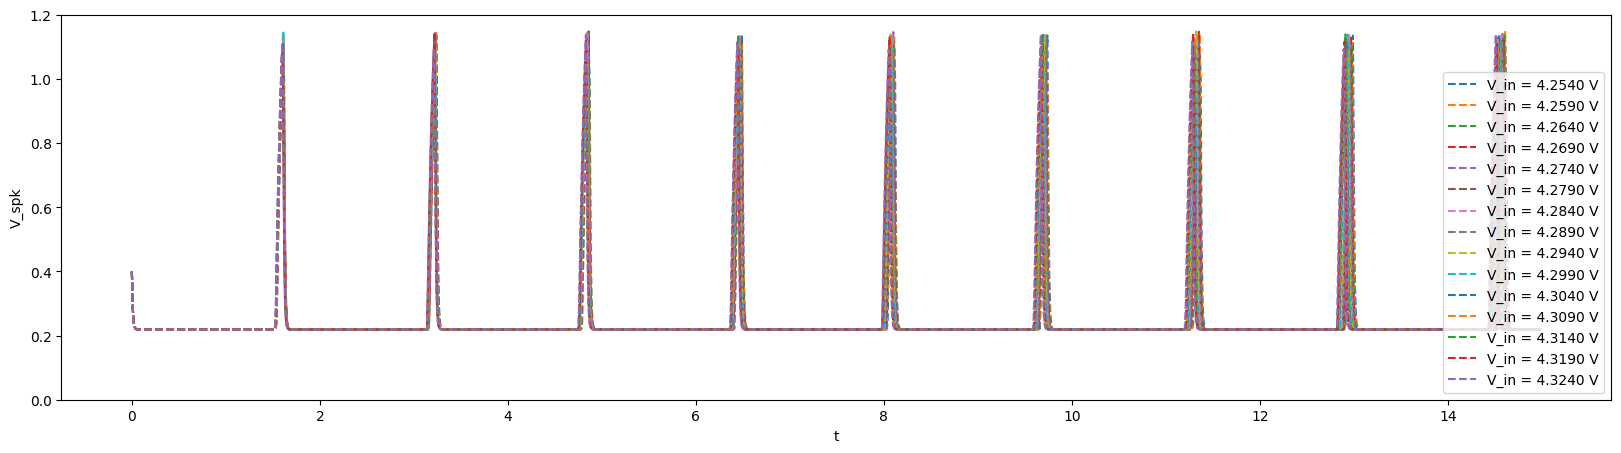

In [54]:
plt.figure(figsize=[20,5])
for i in range(850,865):
    # i = k * 100
    plt.plot(data[0,:,i], data[2,:,i], '--', label=f'V_in = {data[1,0,i]:.4f} V')
plt.legend()
plt.ylim([0,1.2])
plt.xlabel('t')
plt.ylabel('V_spk')

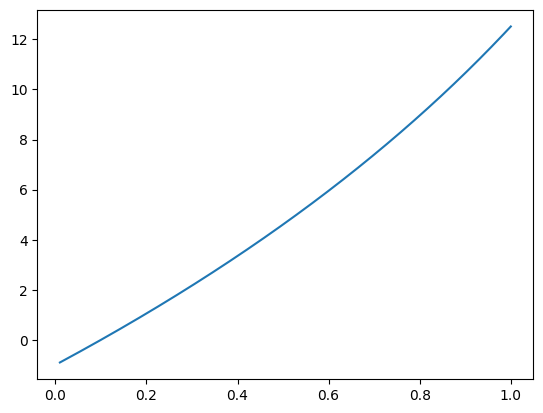

In [34]:
beta = 0.95
T = np.linspace(0.01,1,1000)
W = 0.1
X = 1

t = (np.log((W*X+beta*T-T)/W/X) / np.log(beta)) - 1
plt.plot(T, t)

In [81]:
data_diff = data[:,1:,:] - data[:,:-1,:]

torch.Size([3, 1500, 999])

/scratch/slurm_tmpdir/job_22380532/ipykernel_885496/2294529.py:13: RuntimeWarning: invalid value encountered in log
  Z = ((np.log((W+X*Y-Y)/W) / np.log(X)) - 1 - 50)**2
/scratch/slurm_tmpdir/job_22380532/ipykernel_885496/2294529.py:13: RuntimeWarning: divide by zero encountered in divide
  Z = ((np.log((W+X*Y-Y)/W) / np.log(X)) - 1 - 50)**2
/scratch/slurm_tmpdir/job_22380532/ipykernel_885496/2294529.py:13: RuntimeWarning: invalid value encountered in divide
  Z = ((np.log((W+X*Y-Y)/W) / np.log(X)) - 1 - 50)**2


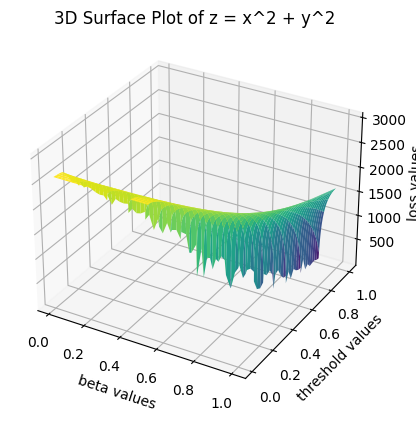

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Generate a range of x and y values
x = np.linspace(0.01, 1, 1000)
y = np.linspace(0.01, 1, 1000)

# Create a meshgrid for x and y
X, Y = np.meshgrid(x, y)

# Calculate the corresponding z values
ts = find_interval(simulation_spikes)
Z = ((np.log((W+X*Y-Y)/W) / np.log(X)) - 1 - ts)**2

# Create a figure
fig = plt.figure()

# Add a 3D subplot to the figure
ax = fig.add_subplot(111, projection='3d')

# Create the surface plot
ax.plot_surface(X, Y, Z, cmap='viridis')

# Set the labels for the x, y, and z axes
ax.set_xlabel('beta values')
ax.set_ylabel('threshold values')
ax.set_zlabel('loss values')

# Set the title of the plot
ax.set_title('3D Surface Plot of z = x^2 + y^2')

# Display the plot
plt.show()
